In [4]:
from skimage.io import imread
from skimage.transform import resize
from skimage.filters import sobel_h, sobel_v, sobel, gaussian
import numpy as np
from tqdm import tqdm

In [5]:
from skimage.filters import sobel_h, sobel_v, sobel, gaussian
#def parse(img):
    

In [2]:
import matplotlib.pyplot as plt

In [5]:
train = []
for num in range(591):
    zero = np.zeros((320, 320, 3))
    img = np.array(imread('data6/train/' + str(num) + '.png'), dtype = np.float32)
    #img -= np.mean(img)
    #img /= 255
    zero[:img.shape[0],:img.shape[1], :img.shape[2]] = img
    train.append(zero)
train = np.array(train)
train.shape

(591, 320, 320, 3)

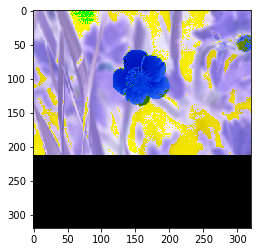

In [6]:
plt.imshow(train[0])
plt.show()

In [8]:
labels = np.zeros((591, 320, 320), dtype = int)
for num in tqdm(range(591)):
    img = imread('data6/train_mask/' + str(num) + '.png')
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            labels[num, i, j] = img[i, j]

100%|██████████| 591/591 [00:19<00:00, 29.71it/s]


In [10]:
test = []
sizes = []
for num in range(16):
    zero = np.zeros((320, 320, 3))
    img = np.array(imread('data6/test/' + str(num) + '.png'), dtype = np.float32)
    sizes.append(img.shape)
    #img = 0.299 * img[:, :, 0] + 0.587 * img[:, :, 1] + 0.114 * img[:, :, 2]
    img -= np.mean(img)
    img /= 255
    zero[:img.shape[0],:img.shape[1], :img.shape[2]] = img
    test.append(zero)
test = np.array(test)
test.shape

(16, 320, 320, 3)

In [11]:
def saver(path, res, sizes):
    with open(path, 'w') as out:
        print('Pixel,Label', file = out)
        for num in range(res.shape[0]):
            for i in range(sizes[num][0]):
                for j in range(sizes[num][1]):
                    print('{num}-{i}-{j},{res}'.format(num = num + 1, i = i, j = j, res=res[num, i, j]), file = out)

In [12]:
from keras.models import Sequential
from keras.layers import Reshape
from keras.models import Model
from keras.layers.core import Layer, Dense, Dropout, Activation, Flatten, Reshape, Permute
from keras.layers import Input, merge, Convolution2D, MaxPooling2D, UpSampling2D, Reshape, core, Dropout
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Convolution3D, MaxPooling3D, ZeroPadding3D , ZeroPadding3D , UpSampling3D, Conv3D
from keras.layers.convolutional import Convolution2D, MaxPooling2D, UpSampling2D, ZeroPadding2D
from keras.layers.convolutional import Convolution1D, MaxPooling1D
from keras.layers.recurrent import LSTM
from keras.layers.advanced_activations import LeakyReLU
from keras.backend import set_image_data_format
from keras.optimizers import Adam , SGD
from keras.layers.embeddings import Embedding
from keras.utils import np_utils
from keras import backend as K

nClasses = 24
input_width=320
input_height=320
nChannels=3
inputs = Input((input_height, input_width, nChannels))
#conv0 = Conv3D(8, (3, 3, 3), activation='relu', padding='same')(inputs)
#rshp = Reshape((320, 320, 24))(conv0)
conv1 = Convolution2D(24, 3, 3, activation='relu', border_mode='same')(inputs)
#conv1 = Dropout(0.25)(conv1)
conv1 = Convolution2D(24, 3, 3, activation='relu', border_mode='same')(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    
conv2 = Convolution2D(48, 3, 3, activation='relu', border_mode='same')(pool1)
#conv2 = Dropout(0.25)(conv2)
conv2 = Convolution2D(48, 3, 3, activation='relu', border_mode='same')(conv2)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    
conv3 = Convolution2D(96, 3, 3, activation='relu', border_mode='same')(pool2)
#conv3 = Dropout(0.25)(conv3)
conv3 = Convolution2D(96, 3, 3, activation='relu', border_mode='same')(conv3)

up1 = merge([UpSampling2D(size=(2, 2))(conv3), conv2], mode='concat', concat_axis=-1)
conv4 = Convolution2D(48, 3, 3, activation='relu', border_mode='same')(up1)
#conv4 = Dropout(0.25)(conv4)
conv4 = Convolution2D(48, 3, 3, activation='relu', border_mode='same')(conv4)
    
up2 = merge([UpSampling2D(size=(2, 2))(conv4), conv1], mode='concat', concat_axis=-1)
conv5 = Convolution2D(24, 3, 3, activation='relu', border_mode='same')(up2)
#conv5 = Dropout(0.25)(conv5)
conv5 = Convolution2D(24, 3, 3, activation='relu', border_mode='same')(conv5)
    
conv6 = Convolution2D(nClasses, 1, 1, activation='relu',border_mode='same')(conv5)

conv7 = core.Activation('softmax')(conv6)

model = Model(input=inputs, output=conv7)

model.compile(loss="categorical_crossentropy", optimizer= 'adam' , metrics=['accuracy'] )
model.summary()

Using TensorFlow backend.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (3, 3), activation="relu", padding="same")`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (3, 3), activation="relu", padding="same")`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), activation="relu", padding="same")`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:32: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), activation="relu", padding="same")`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:35: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), activation="relu", padding="same")`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:37: UserWarni

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 320, 320, 3)   0                                            
____________________________________________________________________________________________________
conv2d_1 (Conv2D)                (None, 320, 320, 24)  672         input_1[0][0]                    
____________________________________________________________________________________________________
conv2d_2 (Conv2D)                (None, 320, 320, 24)  5208        conv2d_1[0][0]                   
____________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)   (None, 160, 160, 24)  0           conv2d_2[0][0]                   
___________________________________________________________________________________________

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:39: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
/usr/local/lib/python3.5/dist-packages/keras/legacy/layers.py:458: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  name=name)
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:40: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), activation="relu", padding="same")`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:42: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), activation="relu", padding="same")`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:44: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `ker

In [13]:
# we create two instances with the same arguments
from keras.preprocessing.image import ImageDataGenerator
data_gen_args = dict(featurewise_center=True,
                     featurewise_std_normalization=True,
                     rotation_range=180.)
labels_gen_args = dict(featurewise_center=False,
                     featurewise_std_normalization=False,
                     rotation_range=180.)
image_datagen = ImageDataGenerator(**data_gen_args)
mask_datagen = ImageDataGenerator(**labels_gen_args)

# Provide the same seed and keyword arguments to the fit and flow methods
seed = 1
image_datagen.fit(train, augment=True, seed=seed)
mask_datagen.fit(labels.reshape(len(labels), 320, 320, 1), augment=True, seed=seed)

image_generator = image_datagen.flow(
    train,
    seed=seed, 
    batch_size = 5)

mask_generator = mask_datagen.flow(
    labels.reshape(len(labels), 320, 320, 1),
    seed=seed, 
    batch_size = 5)
# combine generators into one which yields image and masks
train_generator = zip(image_generator, mask_generator)

#model.fit(
    #train_generator,
    #steps_per_epoch=2000,
    #epochs=3,
    #batch_size = 5)
#model.save('my_model2.h5')
#predictions = np.argmax(model.predict(test, batch_size = 5), axis = 3)
#plt.imshow(predictions[0].reshape((320, 320)))
#plt.show()

In [14]:
def to_categorical(data):
    lens = len(data)
    res = np.zeros((lens, 320, 320, 24))
    for num in range(lens):
        img = data[num]
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                res[num, i, j, int(img[i, j])] = 1
    return res

Epoch 1/1
5/5 [==============================] - 1s - loss: 1.3500 - acc: 0.5573
Epoch 1/1
5/5 [==============================] - 1s - loss: 1.5484 - acc: 0.4884
Epoch 1/1
5/5 [==============================] - 1s - loss: 1.9888 - acc: 0.5260
Epoch 1/1
5/5 [==============================] - 1s - loss: 1.6480 - acc: 0.6220
Epoch 1/1
5/5 [==============================] - 1s - loss: 1.9193 - acc: 0.4826
Epoch 1/1
5/5 [==============================] - 1s - loss: 1.1703 - acc: 0.7245
Epoch 1/1
5/5 [==============================] - 1s - loss: 1.4905 - acc: 0.5522
Epoch 1/1
5/5 [==============================] - 1s - loss: 1.6071 - acc: 0.5452
Epoch 1/1
5/5 [==============================] - 1s - loss: 1.4021 - acc: 0.5578
Epoch 1/1
5/5 [==============================] - 1s - loss: 1.8373 - acc: 0.4470
Epoch 1/1
5/5 [==============================] - 1s - loss: 1.4906 - acc: 0.5276
Epoch 1/1
5/5 [==============================] - 1s - loss: 1.4490 - acc: 0.5417
Epoch 1/1
5/5 [=============

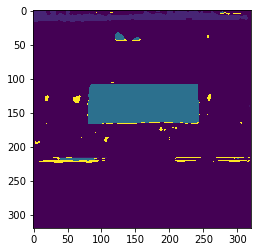

stop


In [19]:
i = 0
for tr in train_generator:
    i += 1
    model.fit(tr[0],
                to_categorical(tr[1]), verbose = 1)
    if (i % 100 == 0):
        model.save('my_model2.h5')
        predictions = np.argmax(model.predict(test, batch_size = 5), axis = 3)
        plt.imshow(predictions[0].reshape((320, 320)))
        plt.show()
        s = input()
        if (s == 'stop'):
            break

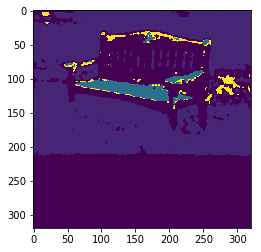

In [20]:
#predictions = np.argmax(model.predict(test.reshape(len(test), 320, 320, 3, 1), batch_size = 5), axis = 3)
plt.imshow(predictions[3].reshape((320, 320)))
plt.show()

In [ ]:
batch_sizes = [5]
for batch_size in batch_sizes:
    model.fit(train.reshape(len(train), 320, 320, 3, 1), 
              labels, 
              batch_size = batch_size, epochs = 2, verbose = 1)
    model.save('my_model1.h5')
    predictions = np.argmax(model.predict(test.reshape(len(test), 320, 320, 3, 1), batch_size = 5), axis = 3)
    plt.imshow(predictions[0].reshape((320, 320)))
    plt.show()

Epoch 1/2
591/591 [==============================] - 198s - loss: 1.8867 - acc: 0.4660   
Epoch 2/2
410/591 [===================>..........] - ETA: 55s - loss: 1.7052 - acc: 0.4171

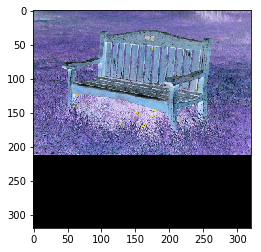

In [43]:
plt.imshow(test[3])
plt.show()

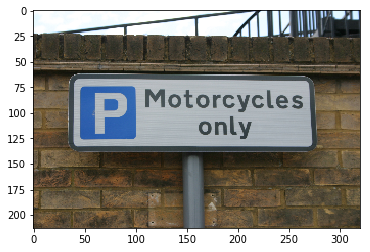

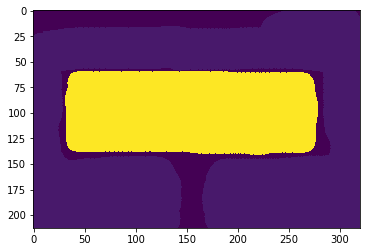

In [7]:
plt.imshow(imread('data6/train/' + str(45) + '.png'))
plt.show()
plt.imshow(imread('data6/train_mask/' + str(45) + '.png'))
plt.show()

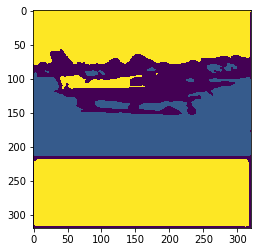

In [43]:
predictions = np.argmax(model.predict(test, batch_size = 5), axis = 3)
plt.imshow(predictions[10])
plt.show()

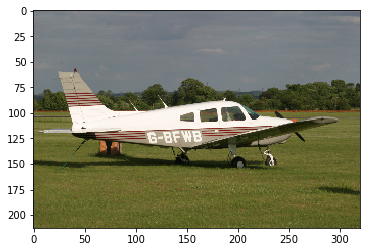

In [31]:
plt.imshow(imread('data6/test/' + str(10) + '.png'))
plt.show()

In [18]:
saver("augment4.csv", predictions, sizes)

In [15]:
for batch_size in batch_sizes:
    model.fit(train, labels, 
              batch_size = batch_size, epochs = 5, verbose = 1)
    model.save('my_model.h5')
    predictions = np.argmax(model.predict(test, batch_size = 5), axis = 3)
    plt.imshow(predictions[0].reshape((320, 320)))
    plt.show()

Epoch 1/5
 95/591 [===>..........................] - ETA: 136s - loss: 1.4213 - acc: 0.3825

KeyboardInterrupt: 

In [ ]:
saver("seven2.csv", predictions)

In [ ]:
for batch_size in batch_sizes:
    model.fit(train, labels, 
              batch_size = batch_size, epochs = 5, verbose = 1)
    model.save('my_model.h5')
    predictions = np.argmax(model.predict(test), axis = 3)
    plt.imshow(predictions[0].reshape((320, 320)))
    plt.show()

In [ ]:
plt.imshow(predictions[2].reshape((320, 320)))
plt.show()

In [ ]:
np.save('predictions.npy', predictions)

In [ ]:
saver("six3.csv", predictions)

In [51]:
import pandas as pd
pd.read_csv('eight1.csv')

,Pixel,Label
0,1-0-0,0
1,1-0-1,0
2,1-0-2,0
3,1-0-3,0
4,1-0-4,0
5,1-0-5,0
6,1-0-6,0
7,1-0-7,0
8,1-0-8,0
9,1-0-9,0


In [1]:
from keras.models import load_model
model = load_model('my_model_old.h5')

Using TensorFlow backend.
/usr/local/lib/python3.5/dist-packages/keras/engine/topology.py:1252: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  return cls(**config)


In [2]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_28 (InputLayer)            (None, 320, 320, 3, 1 0                                            
____________________________________________________________________________________________________
conv3d_26 (Conv3D)               (None, 320, 320, 3, 4 112         input_28[0][0]                   
____________________________________________________________________________________________________
reshape_13 (Reshape)             (None, 320, 320, 12)  0           conv3d_26[0][0]                  
____________________________________________________________________________________________________
conv2d_166 (Conv2D)              (None, 320, 320, 4)   436         reshape_13[0][0]                 
___________________________________________________________________________________________

In [ ]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, 
from keras.layers import Conv2D, MaxPooling2D, LeakyReLU, Activation, Conv3D, Reshape, MaxPooling3D
from keras.layers.normalization import BatchNormalization
from keras.losses import binary_crossentropy
from keras.optimizers import SGD
from tqdm import tqdm
from sklearn.metrics import f1_score, make_scorer

model = Sequential()
model.add(Conv3D(8, (2, 2), padding='same', input_shape=(320, 320, 3, 1)))
model.add(LeakyReLU())
model.add(Conv2D(4, (2, 2), padding='same'))
model.add(LeakyReLU())

model.add(Conv2D(12, (2, 2), padding='same'))
model.add(LeakyReLU())
model.add(Conv2D(12, (2, 2), padding='same'))
model.add(LeakyReLU())

#model.add(MaxPooling3D(pool_size=(1, 1, 2), strides=None, padding='same', data_format=None))

model.add(Conv2D(24, (2, 2), padding='same'))
model.add(LeakyReLU())
model.add(Conv2D(24, (2, 2), padding='same'))
model.add(LeakyReLU())

#model.add(Conv2D(1, (1, 1), padding='same'))

model.add(Activation('softmax'))
#opt = keras.optimizers.SGD(lr=0.001, decay=0.1, momentum=0.1, nesterov=True)

model.compile(loss='categorical_crossentropy', optimizer = 'adam')
model.summary()

batch_sizes = [8]
for batch_size in batch_sizes:
    model.fit(train, labels, 
              batch_size = batch_size, epochs = 6, verbose = 1)
    model.save('my_model.h5')
    predictions = np.argmax(model.predict(test), axis = 3)
    plt.imshow(predictions[0].reshape((320, 320)))
    plt.show()
    #print(f1_score(labels,  np.array(np.round(model.predict(np.reshape(train, (len(train), 320, 320, 3, 1)))), dtype = int)))